<a href="https://colab.research.google.com/github/MatheLeal/bioquant-mod1/blob/ExerciciosSuplementars/Exerc%C3%ADciosuplementarmod4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# activate R magic
%load_ext rpy2.ipython

# **Observação: Este notebook deve ser rodado no colaboratory a partir de um google drive que possua os arquivos "exercicio-anova-1.xlsx" e "exercicio-anova-2.xlsx".**




# **Importando arquivos xlsx em Python:**
Encontre os arquivos "exercicio-anova-1.xlsx" e "exercicio-anova-2.xlsx" no seu google drive, clique em cada um deles e abra-os com planilhas google (google sheets). Copie o File id como na imagem abaixo, e cole abaixo no local indicado dentro desta seção. 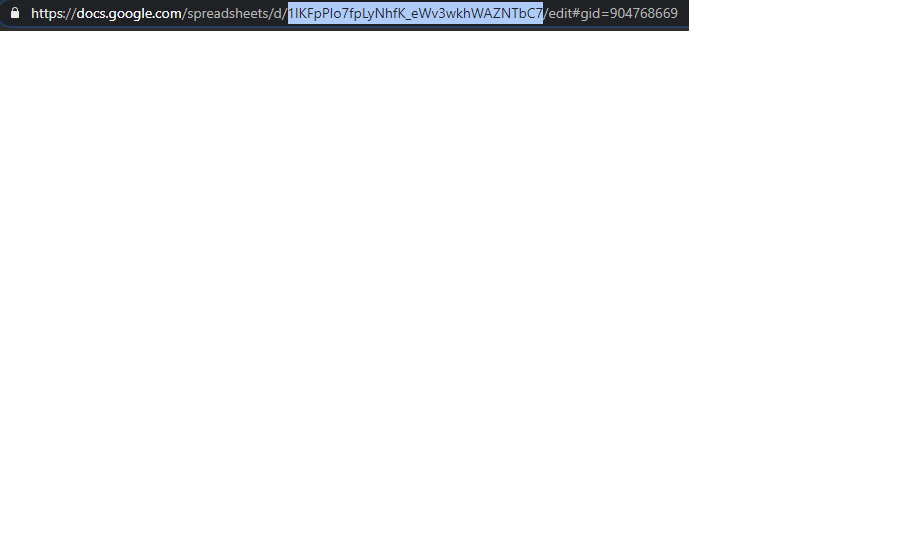


In [84]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#copie na linha abaixo, entre os apostrofos, o file_id do exercicio-anova-1.xlsx
file_id = '1DIWjtQsw_zZDSa5Wqgx35gigvjWQaxg6'#<-------- cole aqui
downloaded1 = drive.CreateFile({'id': file_id})

#copie na linha abaixo, entre os apostrofo,s o file_id do exercicio-anova-2.xlsx
file_id = '1jIGZkxW95td9Eim94Su58Z4bjfrkVvqk'#<-------- cole aqui
downloaded2 = drive.CreateFile({'id': file_id})

In [85]:
downloaded1.GetContentFile('exercicio-anova-1.xlsx')
downloaded2.GetContentFile('exercicio-anova-2.xlsx')

In [86]:
import pandas as pd
df1 = pd.read_excel('exercicio-anova-1.xlsx')
df2 = pd.read_excel('exercicio-anova-2.xlsx')

# **Exercicio 1 do módulo 4 em R:**

In [ ]:
%Rpush df1


In [ ]:
%%R
## EXERCICIO 1


# Voce e um consultor ambiental e foi contratado para um determinado empreendimento.Para realizar os estudos, voce estratificou
# a area experimental em 4 estratos, e amostrou 200 arvores em cada estrato. Agora voce necessita saber se os estratos
# são signicativamente diferentes em relacao ao volume vegetal coletado, e quais estratos diferem entre si, para que as
# analises prossigam.
# Responda essas questoes com os metodos estatisticos adequados.
# OBS: Nao esqueca de responder as questoes levantadas apontando a hipotese nula e alternativa se for realizado um teste
# de hipoteses

# Neste caso vamos usar anova one way pois estamos analisando um unico fator(uma única váriavel independente); 
# Temos mais de duas amostras e queremos saber se existe diferencia real 
# entre as medias. 

#Dividindo os dados em 4 grupos.
estrato1 <- df1$dados [1:200]
estrato2 <- df1$dados [201:400]
estrato3 <- df1$dados[401:600]
estrato4 <- df1$dados[601:800]



In [ ]:
%%R
# Criando as variaveis dependentes
Varidep <- c(estrato1, estrato2, estrato3, estrato4)

# Criar as variaveis independentes
Variindep <- c(rep("estrato1", 200), rep("estrato2", 200), rep("estrato3", 200), 
         rep("estrato4", 200))

# data.frame
Estratos <- data.frame(Variindep, Varidep)

In [ ]:
%%R
# Premissas
# 1. Normalidade
shapiro.test(estrato1)

In [ ]:

%%R
shapiro.test(estrato2)

In [ ]:

%%R
shapiro.test(estrato3)

In [ ]:
%%R
shapiro.test(estrato4)

In [ ]:
%%R
# 2. Homocedasticidade
# Usaremos o test de levene que calcula a homocedasticidade
# H0 = variancia entre os grupos igual
# levene.test(y = vetor numerico, group = fator dos dados)
install.packages("lawstat")
library(lawstat)
levene.test(Estratos$Varidep, group = Estratos$Variindep)
#A variancia entre os grupos é igual.

# 3. Independencia das amostras
#As amostras foram retiradas de 4 estratos diferentes, portanto são independentes.

In [ ]:
%%R
# aov(formula = y variando em relacao a X, data = tabela)
resultado <- aov(Varidep ~ Variindep, data = Estratos)
summary(resultado)

#O resultado foi F > 1 com um P valor de 2e-16, se coniderarmos um valor de significancia de 0,05 rejeitaremos H0, ou seja
#as médias são diferentes.

# **Exercício 2 do módulo 4 em R:**

In [ ]:
%Rpush df2

In [ ]:
%%R
## EXERCICIO 2


# Em um laboratorio foi realizada a coleta de plasma sanguineo de 20 pequenos roedores, e o grupo de pesquisa quer
# saber se determinado hormonio afeta o nivel de plasma sanguineo, se ha diferenca entre esse nivel para machos e 
# femeas e se existe diferenca entre machos e femeas na presenca de hormonio e/ou na ausencia dele.
# Responda as questoes levantadas utilizando metodos estatisticos adequados

#Neste caso usaremos a anova two way, pois temos dois fatores para analisar.
#Variavel dependente

Plasma <- df2$Plasma

#Variaveis independentes

Tratamento <- c(rep("presença", 10) , rep("ausência", 10))

Sexo <- c(rep("macho",5), rep("femea",5), rep("macho",5), rep("femea",5))

# Data.frame
Tabela <- data.frame(Sexo, Tratamento, Plasma)
Tabela

In [ ]:
%%R
# 1. Normalidade Tratamento

shapiro.test (Tabela[Tabela$Tratamento == "presença",]$Plasma)




	Shapiro-Wilk normality test

data:  Tabela[Tabela$Tratamento == "presença", ]$Plasma
W = 0.95637, p-value = 0.7438



In [ ]:
%%R
shapiro.test (Tabela[Tabela$Tratamento == "ausência",]$Plasma)


In [ ]:
%%R
#dados apresentam distribuição normal considerando 0,05 de significancia

# 1. Normalidade Sexo

shapiro.test (Tabela[Tabela$Sexo == "macho",]$Plasma)


In [ ]:
%%R
shapiro.test (Tabela[Tabela$Sexo == "femea",]$Plasma)
#dados apresentam distribuição normal considerando 0,05 de significancia

In [ ]:
%%R
# 2. Homocedasticidade
levene.test(Tabela$Plasma, group = Tabela$Tratamento)

#H1 variancia não é homogenea considerando 0,05 de significancia



In [ ]:
%%R
levene.test(Tabela$Plasma, group = Tabela$Sexo)

#H0 variancia é homogenea considerando 0,05 de significancia

#Visto a heterocedasticidade esta analise de variância é inválida.

# OBS: Nao esqueca de responder as questoes levantadas apontando a hipotese nula e alternativa se for realizado um teste
# de hipoteses


# OBS 2: Na coluna "tratamentos", o numero 1 significa  "presenca do hormonio" e o numero 2"ausencia do hormonio";
# Na coluna "sexo", o numero 1 significa "macho" e o numero 2 "femea".